# MTH5001 Introduction to Computer Programming - Lecture 9
Module organisers Dr Lucas Lacasa and Prof. Thomas Prellberg

So far, we have used Python as an isolated sandbox to work in. What is sorely missing is a way to interact with the external world, i.e. to be able to input and output data. In this lecture we will look how Python deals with data input and output, from reading and writing basic text to the manipulation of data frames.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Strings

A string in Python is a sequence of characters. We have already informally encountered strings when we used the `print()` function to give out text strings such as 
```python
print("exact root found")
```
And you might have noticed that Python allows different delimiters of strings: \',",\'\'\', and """ are all allowed, with the latter allowing a string to extend across multiple lines and include linebreaks, as when we wrote document strings in functions.

In [2]:
print("Hello")
print()
print('Hello')
print()
print('''Hello''')
print()
print("""Hello
   World!""")


Hello

Hello

Hello

Hello
   World!


Any character can appear in a string, but if we want to include special characters in a string while writing Python code, we sometimes need to use special character sequences using a backslash `\` to include it in a string.

In [3]:
print('\'Hello\'') #single quotes \'
print()
print('Hello\tWorld')  #tab \'
print()
print('Hello\nWorld')  #new line \n
print()
print('Hello\\World')  #backslash \\
print()
'Hello\nWorld' # note that the string looks different when not printed

'Hello'

Hello	World

Hello
World

Hello\World



'Hello\nWorld'

In [4]:
'Hello\nWorld'[5] # newline is a single character

'\n'

### Indexing strings

Strings behave like other iterables, i.e. we can access single characters and substrings by indexing.

In [5]:
my_string="Hello World!"
print(my_string[6])
print()
print(my_string[0:5])
print()
print(my_string[-6:-1])
print()
print(my_string[::-1])
print()
print(my_string[2:9:2])

W

Hello

World

!dlroW olleH

loWr


We can also use strings in for loops.

In [6]:
for letter in my_string:
    print(letter)

H
e
l
l
o
 
W
o
r
l
d
!


However, strings are immutable, i.e. we cannot change parts of a string once it is defined, so they behave more like tuples than lists.

In [7]:
# this will produce an error
#my_string[6]='w'

Once a string has been assigned, there is basically only one way to remove it, using the keyword `del` (which can be used to remove anything else we have defined as well).

In [8]:
del my_string
#print(my_string)

### String operations

Strings can be concatenated with `+`, and muliplication by an integer $n$ using `*` gives $n$-fold concatenation.

In [9]:
print('Hello '+'World!')
print(3*'Hello ')

Hello World!
Hello Hello Hello 


Functions we already used with other enumerables work with strings as well.

In [10]:
print(len('Hello'))
print(list(enumerate('World')))

5
[(0, 'W'), (1, 'o'), (2, 'r'), (3, 'l'), (4, 'd')]


### String methods

There are many ways to change strings in Python. A good listing of all the methods can be found [here](https://www.programiz.com/python-programming/strings-method). You may have to use this quite a few times when working with strings in the lab. I will just give you a few examples here.

In [11]:
my_string="hello world!"
print(my_string)
print(my_string.capitalize())
print(my_string.center(80,"*"))
print(my_string.split())

hello world!
Hello world!
**********************************hello world!**********************************
['hello', 'world!']


The last method `.split()` is a good way to break down longer text strings into their parts. It takes as optional argument a separator string (the default is an empty space ' '), so if you get a \*.csv file, you can split using a comma as separator string (remember what csv stands for...).

In [12]:
print("123.45,38.9,Vauxhall".split())
print("123.45,38.9,Vauxhall".split(','))

['123.45,38.9,Vauxhall']
['123.45', '38.9', 'Vauxhall']


### Formatting

Formatting is a great way to produce good looking output. You can put placeholders `{}` into a string which are being filled by the arguments of `.format()`. The placeholders can contain formatting specifications, which is very useful for formatting numbers. I will only give you a few examples here, you should consult [here](https://www.programiz.com/python-programming/methods/string/format) if you need to know more.

In [13]:
print("Hello {0} world!".format("happy"))
print("Binary representation of {0} is {0:b}".format(12))
print("Exponent representation: {0:e}".format(1566.345))
print("One third is: {0:.3f}, and one quarter is: {1:.3f}".format(1/3,1/4))

Hello happy world!
Binary representation of 12 is 1100
Exponent representation: 1.566345e+03
One third is: 0.333, and one quarter is: 0.250


For those of you who know the programming language C, there is also a way to use C-style formatting.

In [14]:
x=np.pi
print('The value of Pi to three digits is %4.2f' %x)

The value of Pi to three digits is 3.14


## File Input/Output

### Opening and closing files

Files are named locations on external memory where data is stored. To access a file for reading or writing we need to open it, and when we are finished we need to close it again.

In Python, this is done with the built-in function `open()` and the method `.close()`. The function `open()` returns a file object, which we assign to a variable to be able to access it for read or write operations.

In [15]:
f=open("test.txt",'w') #open file in current directory
### perform file operations
f.close()

The default mode is to open the file for reading. Other modes can be specified when opening a file. Here, we shall use `r` (read, default), `w` (write), and `a` (append). For other modes, see [here](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files):

`r` opens a file for reading (default). If the file does not exist, the operation fails.

`w` opens a file for writing. If the file exists, it gets overwritten. If the file does not exist, it gets created.

`a` opens a file for appending. If the file exists, anything written to it gets appended to the end of the file. If the file does not exist, it gets created.



The way data gets stored in a file is platform dependent. If you want files you create to be readable on different platforms, you need to specify the encoding explicitly. I suggest you use
```python
f=open("test.txt",'r',encoding='utf-8')
```

If an open file gets not closed correctly, data in it might become corrupted. (This is why you should never just switch off a computer, but rather shut it down.) When developing a code, this can happen if the code you are writing contains errors and execution of the code gets terminated before the .close() is executed. It is therefore safer to open a file using the `with` statement as follows.
```python
with open("test.txt") as f:
    ### perform file operations
```
In this way, the `.close()` method is performed internally when the code block inside `with` is exited.

### Reading and writing files

Files essentially contain text strings called lines. `readlines()`, returns the whole file as a list of strings, and `writelines(lines)` writes `lines` to the file, where `lines` is a list of strings. Similarly, `readline()` reads a single line, and `write(line)` writes the string `line` to the file.

Lines are slightly different from strings in that they normally contain a newline character at their end (unless it is the last line of a file, in which case this may be missing).

 Lets look at an example.

In [16]:
data=['Professor Thomas Prellberg\n',
       'Professor of Mathematics\n',
       'Email: t.prellberg@qmul.ac.uk\n',
       'Telephone: +44 (0)20 7882 5490\n',
       'Room Number: Mathematics Building, Room: MB523\n'
       'Website: http://www.maths.qmul.ac.uk/~tp/\n']
with open("test.txt",'w') as f:
        f.writelines(data)

The above writes the content of `data` to a file named test.txt. Lets read this file and check its content.

In [17]:
with open("test.txt",'r') as f:
    data1=f.readlines()
print(data1)

['Professor Thomas Prellberg\n', 'Professor of Mathematics\n', 'Email: t.prellberg@qmul.ac.uk\n', 'Telephone: +44 (0)20 7882 5490\n', 'Room Number: Mathematics Building, Room: MB523\n', 'Website: http://www.maths.qmul.ac.uk/~tp/\n']


If the newline character is missing, strings are concatenated when using `writelines()`.

In [18]:
office_hours=['Office Hours: Monday 11:30-12:30 ',
              'during term times, also by email appointment\n']
with open("test.txt",'a') as f:
    f.writelines(office_hours)
with open("test.txt",'r') as f:
    data1=f.readlines()
print(data1)

['Professor Thomas Prellberg\n', 'Professor of Mathematics\n', 'Email: t.prellberg@qmul.ac.uk\n', 'Telephone: +44 (0)20 7882 5490\n', 'Room Number: Mathematics Building, Room: MB523\n', 'Website: http://www.maths.qmul.ac.uk/~tp/\n', 'Office Hours: Monday 11:30-12:30 during term times, also by email appointment\n']


Note that the appended two strings have been joined to one line.

A file itself can be used as an iterable, i.e. we can go through all the lines in a file in a for loop, which is very convenient!

In [19]:
with open("test.txt",'r') as f:
    for line in f:
        print(line)

Professor Thomas Prellberg

Professor of Mathematics

Email: t.prellberg@qmul.ac.uk

Telephone: +44 (0)20 7882 5490

Room Number: Mathematics Building, Room: MB523

Website: http://www.maths.qmul.ac.uk/~tp/

Office Hours: Monday 11:30-12:30 during term times, also by email appointment



Note how here the print statement produces blank lines due to the presence of newline character. Lets remove these. We can either remove the last character in each line using the index `[:-1]` or by using the method `.rstrip()`, which also removes trailing spaces.

In [20]:
with open("test.txt",'r') as f:
    for line in f:
        print(line.rstrip())

Professor Thomas Prellberg
Professor of Mathematics
Email: t.prellberg@qmul.ac.uk
Telephone: +44 (0)20 7882 5490
Room Number: Mathematics Building, Room: MB523
Website: http://www.maths.qmul.ac.uk/~tp/
Office Hours: Monday 11:30-12:30 during term times, also by email appointment


### Reading and writing numerical data

Now that we know how to read and write to files, there is one thing missing. We can only read and write text strings, and when we want to deal with numerical data we still need to do a conversion between strings and numbers. No matter which programming language you use, this can be quite cumbersome.

In [21]:
Pi=np.pi
with open("test.txt",'w') as f:
    f.write(str(Pi))
    #f.write(Pi) produces error message
with open("test.txt",'r') as f:
    X=float(f.readline())
print("{0} == {1} is {2}".format(Pi,X,X==Pi))

3.141592653589793 == 3.141592653589793 is True


This looks easy but if someone gives you a file with numerical data a lot of stuff can go wrong. Lets say the data is in lines which contain spaces and also some other characters (comma, semicolon, etc) to separate the individual numbers. How can we deal with that? There are several ways to do this, such as parsing a text string using [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) after importing the module [re](https://docs.python.org/3/library/re.html). I will not go into details about this here.

### Reading and writing numpy data

If your data is in a *standard* format, it is much easier to work with file input/output. For example, a single numpy array can be read and written with the functions `numpy.loadtxt()` and `numpy.savetxt()`. The nice thing is that you don't have to worry about opening or closing files, it is done for you. You just have to specify the filename and the array.

In [22]:
A=np.random.random((5,3))
print(A)
np.savetxt("test.txt",A)

[[0.60042033 0.71768793 0.94979746]
 [0.25595959 0.85289103 0.59640932]
 [0.06810877 0.76033715 0.67310098]
 [0.85306371 0.39097312 0.88452736]
 [0.8160931  0.26858904 0.26096682]]


As this is a plain text file, we can see what it looks like using `readlines()`.

In [23]:
with open("test.txt",'r') as f:
    for line in f:
        print(line.rstrip())

6.004203312655297387e-01 7.176879333857041354e-01 9.497974571157400403e-01
2.559595861806229777e-01 8.528910346211568960e-01 5.964093229034969079e-01
6.810876914177099728e-02 7.603371466051349614e-01 6.731009770345586229e-01
8.530637055321537154e-01 3.909731158504874404e-01 8.845273608902666229e-01
8.160931017293241441e-01 2.685890415746222670e-01 2.609668247112350015e-01


Lets load this as a new array instead.

In [24]:
B=np.loadtxt("test.txt")
print(B)

[[0.60042033 0.71768793 0.94979746]
 [0.25595959 0.85289103 0.59640932]
 [0.06810877 0.76033715 0.67310098]
 [0.85306371 0.39097312 0.88452736]
 [0.8160931  0.26858904 0.26096682]]


Element-wise comparison shows equality of both arrays.

In [25]:
print(A==B)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


The advantage of the method described here is that the data is stored as a plain text file, which you can easily read. See [here](https://www.python-course.eu/numpy_reading_writing.php) for alternatives involving e.g. binary data.

## Pandas

When it comes to Python, Pandas are not cuddly animals but rather Pandas is the name of the *Python Data Analysis Library*, and if you want to do modern data analytics with Python, you will hardly manage to avoid [Pandas](https://pandas.pydata.org/). Its [DataFrame](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html) object is becoming a standard for spreadsheet data. For example, there are ready-made tools available to directly access statistical or financial data from the web. These services are provided by the World Bank, OECD, Eurostat, Nasdaq, and many more.

In [26]:
import pandas as pd

### An example: reading currency exchange data

Lets say you want to analyse the USDGBP exchange rates for the last 5 years. It turns out that you can load this data directly from the web using tools from the `pandas_datareader`. In this case, we are accessing data provided by the Federal Reserve Bank of St. Louis, which are updated weekly.

In [27]:
import pandas_datareader.data as web
USUKrates=web.DataReader('DEXUSUK', 'fred')
print(USUKrates)
type(USUKrates)

            DEXUSUK
DATE               
2016-03-15   1.4166
2016-03-16   1.4100
2016-03-17   1.4490
2016-03-18   1.4514
2016-03-21   1.4402
...             ...
2021-03-01   1.3938
2021-03-02   1.3962
2021-03-03   1.3978
2021-03-04   1.3999
2021-03-05   1.3817

[1299 rows x 1 columns]


pandas.core.frame.DataFrame

The result of this operation is a currency exchange table stored in a DataFrame. The DataFrame comes with many useful methods; for example, the data in a DataFrame can easily be plotted by simply using the method `.plot()`, and we can ask for a simple description using `.describe()`

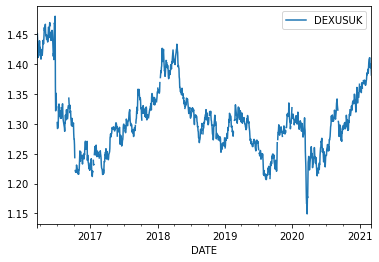

           DEXUSUK
count  1241.000000
mean      1.305649
std       0.057355
min       1.149200
25%       1.267400
50%       1.300700
75%       1.328500
max       1.480000


In [28]:
USUKrates.plot()
plt.show()
print(USUKrates.describe())

Data obtained like this is not necessarily 'clean'. For example, you see a few gaps/jumps in the plot above due to a few NaN's (not a number), presumably because data was not available on certain dates. Let's clean it up (remove the NaN's) and smooth it by computing a moving average (i.e. the average over $n$ consecutive data points).

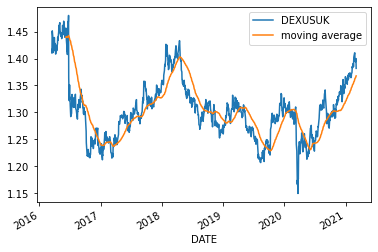

In [29]:
USUKratesClean=USUKrates.copy().dropna()
USUKratesClean['moving average']=USUKratesClean['DEXUSUK'].rolling(window=60).mean()
USUKratesClean.plot()
plt.show()

### DataFrames

So what precisely is a DataFrame object? It is essentially a two-dimensional spreadsheet just as in Excel, i.e. it is an array with row and column labels. Lets look at our example. We use `.head()` and `.tail()` to look at the beginning and end of the DataFrame. (Note that `.tail()` conveniently prints out the column labels.)

In [30]:
print(USUKratesClean.head())
print()
print(USUKratesClean.tail())

            DEXUSUK  moving average
DATE                               
2016-03-15   1.4166             NaN
2016-03-16   1.4100             NaN
2016-03-17   1.4490             NaN
2016-03-18   1.4514             NaN
2016-03-21   1.4402             NaN

            DEXUSUK  moving average
DATE                               
2021-03-01   1.3938        1.364025
2021-03-02   1.3962        1.365065
2021-03-03   1.3978        1.366042
2021-03-04   1.3999        1.367127
2021-03-05   1.3817        1.367662


We already encountered `.describe()` above. But now we have two data columns.

In [31]:
print(USUKratesClean.describe())

           DEXUSUK  moving average
count  1241.000000     1182.000000
mean      1.305649        1.300637
std       0.057355        0.047553
min       1.149200        1.228577
25%       1.267400        1.265567
50%       1.300700        1.298109
75%       1.328500        1.320588
max       1.480000        1.442542


Lets look at the column and row labels. The methods `.columns` and `.index` give out these labels and also provide other detailed information.

In [32]:
print(USUKratesClean.columns)

Index(['DEXUSUK', 'moving average'], dtype='object')


In [33]:
print(USUKratesClean.index)

DatetimeIndex(['2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18',
               '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
               '2016-03-25', '2016-03-28',
               ...
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-03',
               '2021-03-04', '2021-03-05'],
              dtype='datetime64[ns]', name='DATE', length=1241, freq=None)


### DataFrames and Numpy Arrays

DataFrames and Numpy Arrays are integrated. We can convert the content of DataFrames to a numpy array.

In [34]:
USUKrates_array=USUKratesClean.values
print(USUKrates_array)

[[1.4166            nan]
 [1.41              nan]
 [1.449             nan]
 ...
 [1.3978     1.36604167]
 [1.3999     1.36712667]
 [1.3817     1.36766167]]


Conversely, we can also create a DataFrame from a numpy array.

In [35]:
USUKrates_df=pd.DataFrame(USUKrates_array)
print(USUKrates_df.head())

        0   1
0  1.4166 NaN
1  1.4100 NaN
2  1.4490 NaN
3  1.4514 NaN
4  1.4402 NaN


Note that indices have been assigned to be row and column labels.

### DataFrame input/output

Finally, DataFrames can be simply loaded from or saved as .csv files.

In [36]:
USUKrates.to_csv('foo.csv')
df_test=pd.read_csv('foo.csv')
print(df_test)

            DATE  DEXUSUK
0     2016-03-15   1.4166
1     2016-03-16   1.4100
2     2016-03-17   1.4490
3     2016-03-18   1.4514
4     2016-03-21   1.4402
...          ...      ...
1294  2021-03-01   1.3938
1295  2021-03-02   1.3962
1296  2021-03-03   1.3978
1297  2021-03-04   1.3999
1298  2021-03-05   1.3817

[1299 rows x 2 columns]


## A current example: real-time Covid-19 data

The last year has unfortunately created another time series of data that is currently much more relevant than currency exchange rates. It turns out that up-to-date data are readily available, courtesy of [Johns Hopkins University](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6).

In [37]:
ConfirmedCases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


So what does this look like?

In [38]:
Deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,112,112,112,112,112,112,112,112,112,112
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,511,511,512,514,515,516,516,517,519,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,2091,2110,2127,2140,2157,2170,2193,2211,2228,2255
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,645,648,650,651,653,654,661,667,679,683
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1109,1113,1116,1124,1132,1137,1140,1148,1149,1153


This is broken down by Province/State, which we may not want if we are only interested in countries. Let us sum over the this, drop the location information, and also transpose the data in preparation for plotting.

In [39]:
def groupedbycountry(df):
    dfbycountry=df.groupby(['Country/Region']).sum()
    return dfbycountry.drop(columns=['Lat','Long']).T

ConfirmedCasesByCountry=groupedbycountry(ConfirmedCases)
DeathsByCountry=groupedbycountry(Deaths)
#RecoveriesByCountry=groupedbycountry(Recoveries)

ConfirmedCasesByCountry.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
3/9/21,55876,114209,114543,11089,21114,862,2162001,175198,29074,479391,...,4241858,65527,80247,3,143321,2526,200382,2586,82897,36321
3/10/21,55894,114840,114681,11130,21161,882,2169694,175538,29090,481919,...,4247879,66484,80268,3,143321,2529,202378,2627,83333,36341
3/11/21,55917,115442,114851,11130,21205,882,2177898,176286,29102,484916,...,4254714,67717,80392,3,144277,2533,203669,2667,83913,36377
3/12/21,55959,116123,115008,11199,21265,945,2185747,177104,29112,488042,...,4261398,69074,80392,3,144786,2550,205652,2729,84240,36423
3/13/21,55959,116821,115143,11228,21323,962,2192025,177899,29117,491065,...,4267015,70133,80481,3,145379,2553,207436,2771,84474,36471


Now we are nearly ready to plot the time series. Let us first look at the combined data for the UK.

In [40]:
UKdata=ConfirmedCasesByCountry.copy()[['United Kingdom']]
UKdata.columns=['Confirmed']
UKdata['Deaths']=DeathsByCountry['United Kingdom']
UKdata

,Confirmed,Deaths
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
3/9/21,4241858,125032
3/10/21,4247879,125222
3/11/21,4254714,125403
3/12/21,4261398,125579


Let us have a look at this.

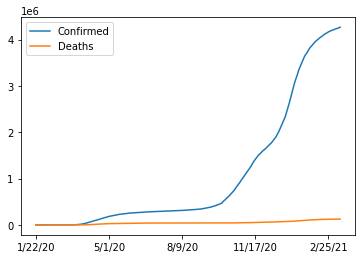

In [41]:
UKdata.plot()
plt.show()

A logarithmic scale clearly shows the exponential growth at the beginning.

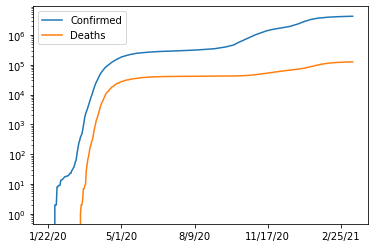

In [42]:
UKdata.plot(logy=True)
plt.show()

More important are daily changes, which we can get by using `.diff()`.

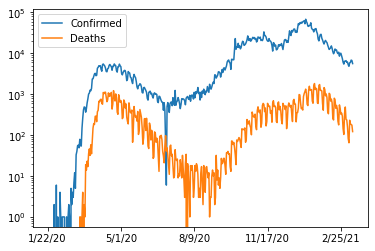

In [43]:
UKdata.diff().plot(logy=True)
plt.show()

Or maybe we should look at smoothed values across a week (remember `rolling(window=7).mean()` from the financial data).

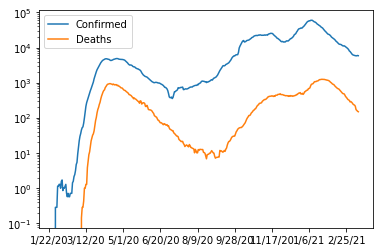

In [44]:
UKdata.diff().rolling(window=7).mean().plot(logy=True)
plt.show()

Or just the deaths on a non-logarithmic scale.

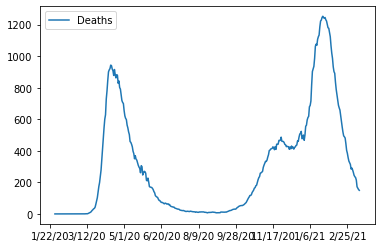

In [45]:
UKdata[['Deaths']].diff().rolling(window=7).mean().plot()
plt.show()

Lets look at just the deaths in some countries with large numbers of infections.

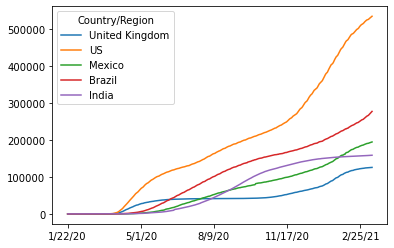

In [46]:
DeathsByCountry[['United Kingdom','US','Mexico','Brazil','India']].plot()
plt.show()

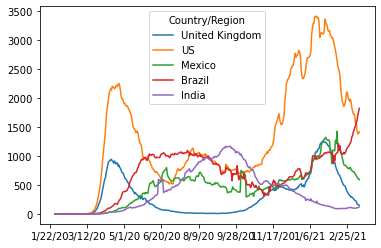

In [47]:
DeathsByCountry[['United Kingdom','US','Mexico','Brazil','India']].diff().rolling(window=7).mean().plot()
plt.show()

Or we may be interested in the worldwide death rate, averaged over a window of 4 weeks.

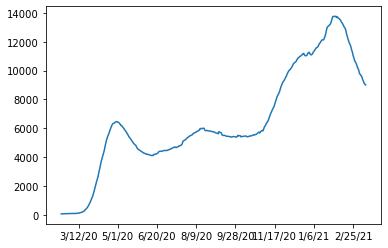

In [48]:
DeathsByCountry.sum(axis=1).diff().rolling(window=28).mean().plot()
plt.show()

Feel free to explore more yourself - you have the tools now!

## Conclusion and Outlook

In this lecture we introduced the mechanics of doing input/output with Python and introduced Pandas DataFrames. In the next lecture we will present more applications of Pandas.